In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("Salary_Data.csv")

In [58]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [59]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [60]:
df.shape

(6704, 6)

In [61]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [62]:
df.info

<bound method DataFrame.info of        Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4        

In [63]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [64]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [65]:
df.dropna(inplace=True)

In [66]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [67]:
df.duplicated().sum()  

np.int64(4911)

In [68]:
df.drop_duplicates(inplace=True)

In [69]:
df.duplicated().sum()

np.int64(0)

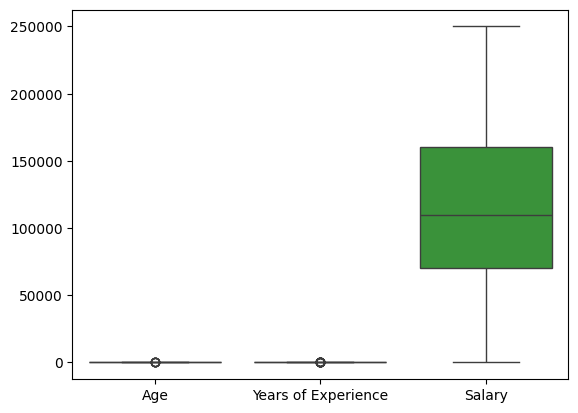

In [70]:
sns.boxplot(data = df)
plt.show()

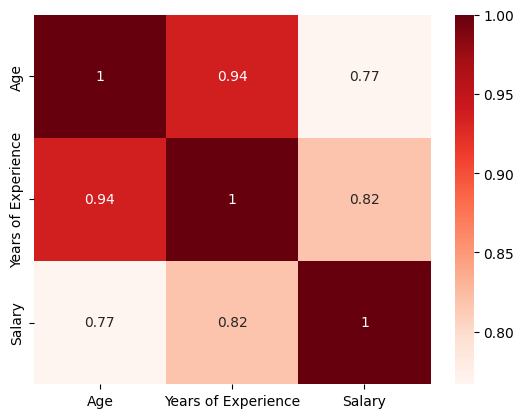

In [71]:
cor = df.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [72]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [73]:
x = df[["Years of Experience"]]
y = df["Salary"]

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)   

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [76]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
X_test

,Years of Experience
5881,2.0
3134,15.0
3388,18.0
2822,4.0
1278,14.0
...,...
1663,3.0
2136,12.0
1651,14.0
210,9.0


In [78]:
X_train

,Years of Experience
111,9.0
5261,0.0
4545,3.0
1658,11.0
4153,2.0
...,...
2801,20.0
2785,10.0
6323,3.0
4143,1.0


In [79]:
y_pred = lr.predict(X_test)

In [80]:
from sklearn.metrics import r2_score

In [81]:
r2 = r2_score(y_test, y_pred)
r2

0.6777150187296515

In [82]:
m = lr.coef_
m

array([6103.10621289])

In [83]:
c = lr.intercept_
c

np.float64(57239.29665761807)

In [84]:
a = m*9 + c
a 

array([112167.25257362])

<Axes: xlabel='Years of Experience', ylabel='Salary'>

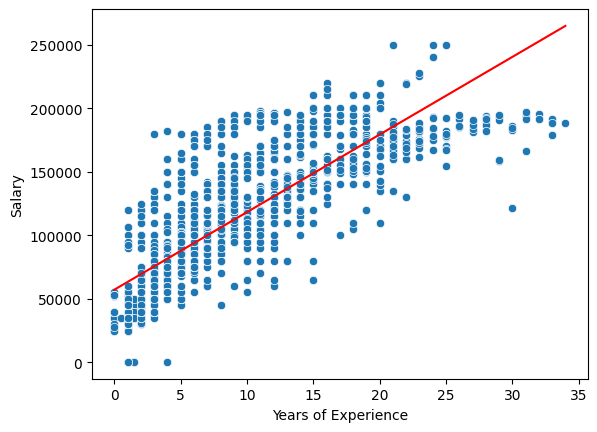

In [85]:
sns.scatterplot(x = df['Years of Experience'], y = df['Salary'])
sns.lineplot(x = df['Years of Experience'], y = lr.predict(df[["Years of Experience"]]), color='red')

In [86]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error

In [88]:
rmse = root_mean_squared_error(X_test, y_test)
rmse

122925.90200674749

In [89]:
mae = mean_absolute_error(X_test, y_test)
mae

111687.83938547486

In [90]:
mse = mean_squared_error(X_test, y_test)
mse

15110777384.172485